<a href="https://colab.research.google.com/github/rahul1804099/Hepatitis-Mortality-Rate-Prediction-Model/blob/main/Summer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hepatitis Mortality Rate Prediction

In [1]:
### Summer Intern Project

In [2]:
### Load Eda packages
import numpy as np
import pandas as pd

In [3]:
### packages to visualize dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load our Dataset
df = pd.read_csv("hepatitis.data")

In [5]:
##Preview the first datapoints
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [6]:
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]

In [7]:
df = pd.read_csv("hepatitis.data",names=col_names)

In [8]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [9]:
df.size

3100

In [10]:
#clean our column names
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [11]:
#convert to lowercase
df.columns.str.lower().str.replace(' ','_')

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [12]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [13]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [14]:
df["age"].unique()

array([30, 50, 78, 31, 34, 51, 23, 39, 32, 41, 47, 38, 66, 40, 22, 27, 42,
       25, 49, 58, 61, 62, 26, 35, 37, 20, 65, 52, 33, 56, 28, 36, 44, 64,
       45, 57, 24, 67, 59, 60, 48, 54,  7, 69, 72, 70, 46, 53, 43])

In [15]:
#replace ? with 0
df = df.replace('?','0')

In [16]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [17]:
#how many columns with object
sum(df.dtypes=="object")

15

In [18]:
#printing colums with dtype object
df.columns[df.dtypes=="object"]

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [19]:
#type casting data
#float can't be typecasted to int
#so leave column 'albumin' & 'bilirubin'
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 
       'alk_phosphate', 'sgot', 'protime']].astype(int)

In [20]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palpable     int64
spiders             int64
ascites             int64
varices             int64
bilirubin          object
alk_phosphate       int64
sgot                int64
albumin            object
protime             int64
histology           int64
dtype: object

In [21]:
#typecasting  column 'albumin' & 'bilirubin' to float
df[['albumin','bilirubin']] = df[['albumin','bilirubin']].astype(float)
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [22]:
#no of items in each row
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [23]:
#shape of dataset
df.shape

(155, 20)

In [24]:
#missing values
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [25]:
##EDA
#descriptive analytics
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [26]:
target_label = {"Die":1,"Live":2}

In [27]:
#counts of items in each class i.e die or live
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

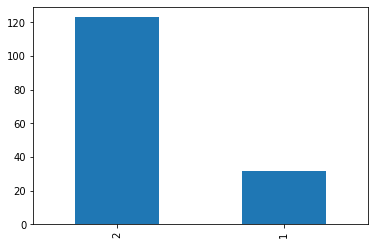

In [28]:
#plot of count
df['class'].value_counts().plot(kind='bar')

In [29]:
#how many are males(1) and females(2)
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

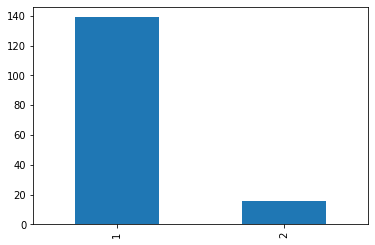

In [30]:
df['sex'].value_counts().plot(kind='bar')

There are more males than females in our dataset

In [31]:
#frequency distribution table using Age range
df['age'].max()

78

Max age is 78

In [32]:
df['age'].min()

7

Min age is 7

So age range is 7-78

In [33]:
labels = ["less than 10","10-20","20-30","30-40","40-50","50-60","60-70","More than 70"]
bins = [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins = bins , labels = labels)).size()

In [34]:
freq_df

age
less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
More than 70     2
dtype: int64

In [35]:
freq_df = freq_df.reset_index(name = 'count')

In [36]:
freq_df

,age,count
0,less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,More than 70,2


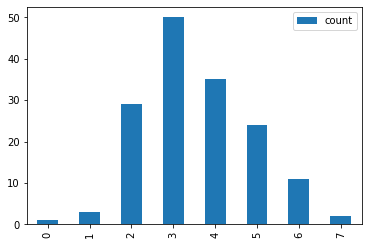

In [37]:
freq_df.plot(kind='bar')

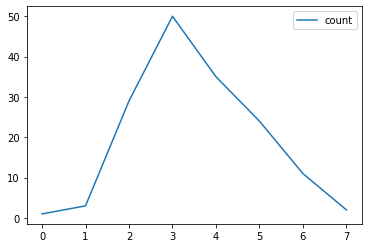

In [38]:
freq_df.plot(kind='line')

Age grp 30-40 is most affected by hepatitis

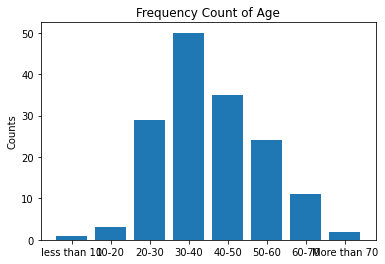

In [39]:
#Plot if Freuency Table
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

Most vulnerable age grp is 30-40 followed by 40-50

Least vulnerable age grp is less than 10 followed by more than 70 grp

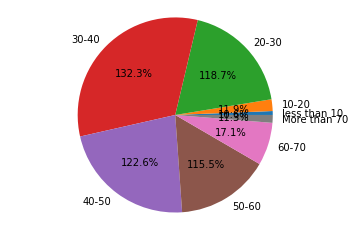

In [40]:
### Pie Chart
labels = ["less than 10","10-20","20-30","30-40","40-50","50-60","60-70","More than 70"]
fig1,ax1 = plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()


### Checking for Outliers
*   Univariate Analysis
*   Multivariate Analysis

## Methods
*  Box plot
*   Scatterplot(Multi)
*   Z-score
*   IQR Interquartile Range






In [41]:
# Using Boxplot for Univariate Outlier
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


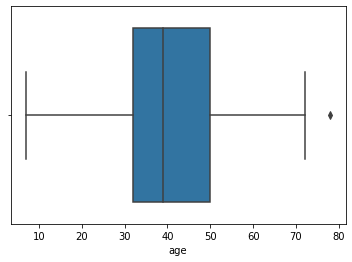

In [42]:
sns.boxplot(df['age'])

In [43]:
df[df['age']==78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


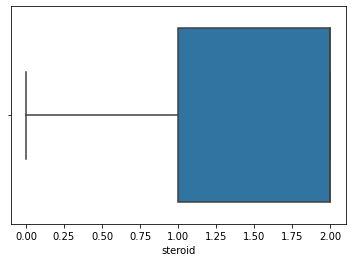

In [44]:
# using boxplot for outlier detection
sns.boxplot(df['steroid'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


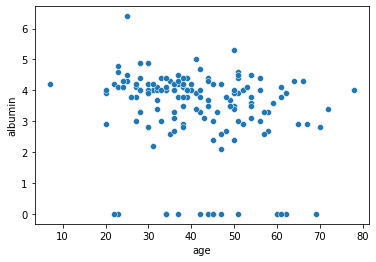

In [45]:
#Scatterplot
sns.scatterplot(df['age'],df['albumin'])

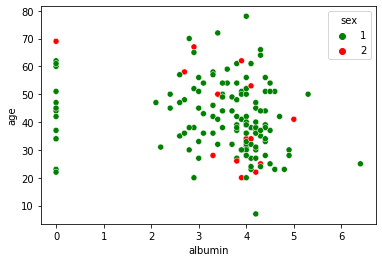

In [46]:
#Scatterplot
sns.scatterplot(x=df['albumin'],y=df['age'],hue=df['sex'],palette=['green','red'],data=df)

###Using IQR

In [47]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [48]:
IQR = q3-q1

In [49]:
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

Cross check boxplot for maximum IQR values

In [50]:
# get actual datapoint that is an outlier
(df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


The datapoints with true are the outliers

Solution for outliers


*   Remove
*   Change
*   Ignore





In [51]:
df_no_outlier = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).any(axis=1)]

In [52]:
df_no_outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [53]:
print(df.shape)
print(df_no_outlier.shape)

(155, 20)
(43, 20)


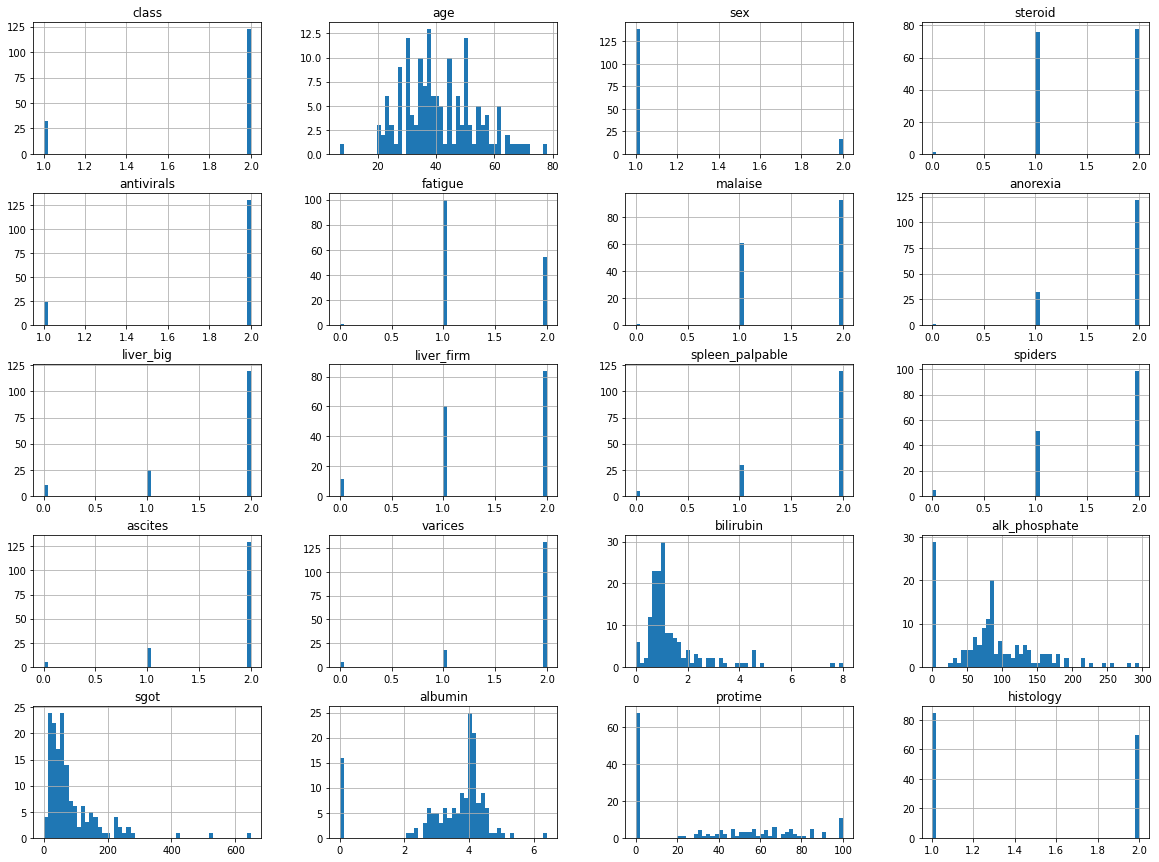

In [54]:
### Plot of distribution of data
df.hist(bins=50,figsize=(20,15))
plt.show()

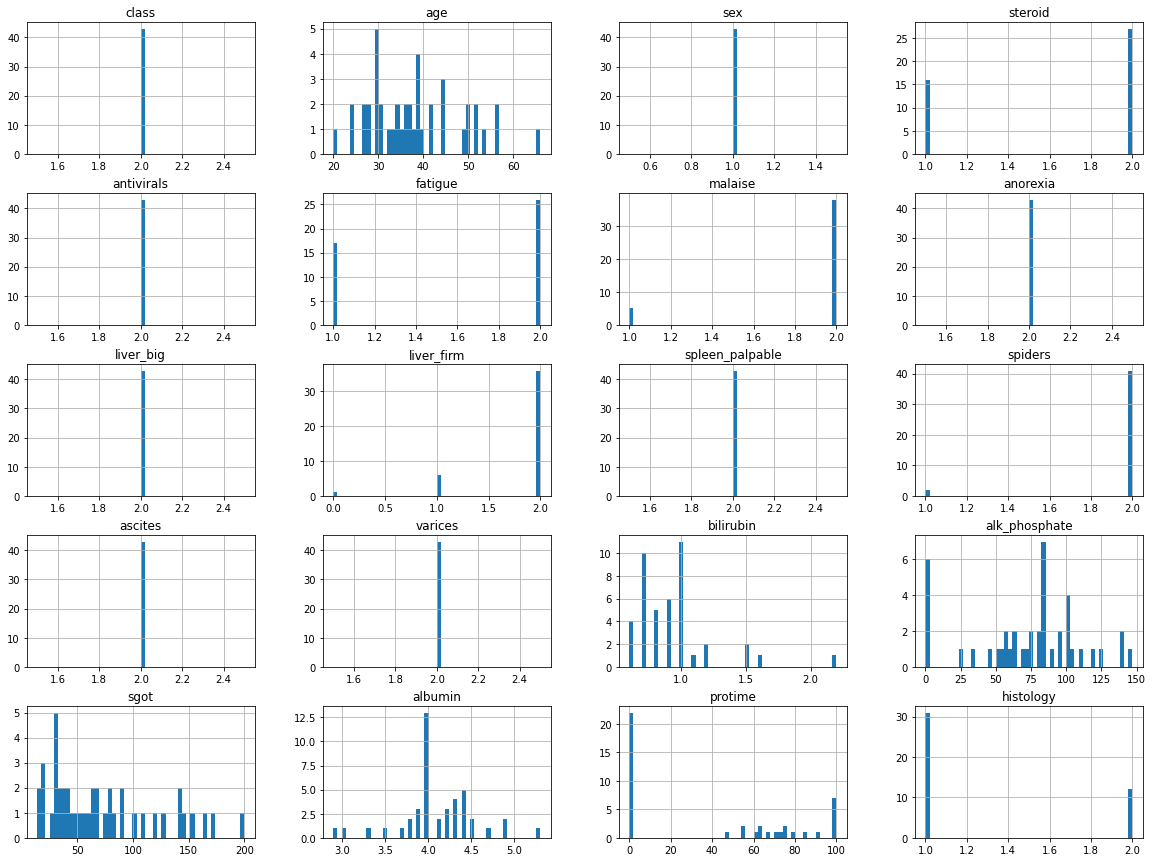

In [55]:
### Plot of distribution of data
df_no_outlier.hist(bins=50,figsize=(20,15))
plt.show()

Feature Selection

*   SelectKbest
     *   Strong relation with the output
*   Recursive Feature elimination





In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  chi2

In [57]:
#Features and labels
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [58]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [59]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = df['class']      

In [60]:
# Using SKbest
skb = SelectKBest(score_func=chi2,k=10)
best_features_fit = skb.fit(xfeatures,ylabels)

In [61]:
#highest score shows the best fit
print("Scores",best_features_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [62]:
# Transform (optional)
bf_02 = best_features_fit.transform(xfeatures)

In [63]:
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [64]:
#Mapping to feature name
feature_score = pd.DataFrame(best_features_fit.scores_,columns=['Feature Scores'])

In [65]:

feature_score

,Feature Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [66]:
feature_column_names = pd.DataFrame(xfeatures.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_score,feature_column_names],axis=1)


In [67]:
best_feat_df

,Feature Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [68]:
#get the best 
#the higher the number the more important the feature
best_feat_df.nlargest(10,'Feature Scores')

,Feature Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [69]:
best_feat_df.nlargest(12,'Feature Scores')

,Feature Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [70]:
best_feat_df.nlargest(12,'Feature Scores')['Feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

### Recursive Feature Elimination

In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [72]:
logit = LogisticRegression()

In [73]:
rfe = RFE(logit,8)

In [74]:
rfe_fit = rfe.fit(xfeatures,ylabels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [75]:
#Selection
selected_features = pd.DataFrame(rfe_fit.support_,columns= ['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns= ['Selected_Features'])

In [76]:
rfe_features_df = pd.concat([feature_column_names,selected_features,ranking_features],axis = 1)

In [77]:
rfe_features_df

,Feature_name,Selected_Features,Selected_Features
0,age,False,8
1,sex,True,1
2,steroid,False,5
3,antivirals,False,9
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


true means we are going to eliminate that feature

RFE we will eliminate the lowest rating or true


## Checking for feature imporatance

*   ExtraTreeClasifier
*   Which feature is important



In [78]:
from sklearn.ensemble import ExtraTreesClassifier

In [79]:
#Initialisation
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures,ylabels)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [80]:
#Print Important
print(et_clf.feature_importances_)

[0.05577164 0.02009664 0.02940236 0.00962558 0.02933905 0.05265796
 0.02959305 0.04099196 0.05343868 0.04576521 0.06371767 0.0955949
 0.05178049 0.09821007 0.07345333 0.05353734 0.07260093 0.06183597
 0.06258718]


In [81]:
feature_importance_df = pd.Series(et_clf.feature_importances_,index = xfeatures.columns)

In [82]:
feature_importance_df

age                0.055772
sex                0.020097
steroid            0.029402
antivirals         0.009626
fatigue            0.029339
malaise            0.052658
anorexia           0.029593
liver_big          0.040992
liver_firm         0.053439
spleen_palpable    0.045765
spiders            0.063718
ascites            0.095595
varices            0.051780
bilirubin          0.098210
alk_phosphate      0.073453
sgot               0.053537
albumin            0.072601
protime            0.061836
histology          0.062587
dtype: float64

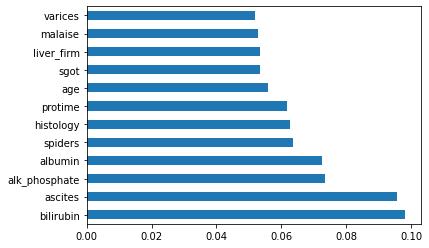

In [83]:
feature_importance_df.nlargest(12).plot(kind='barh')

All the methods gave us almost the same ffeatures tio use

In [84]:
#Correlation
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


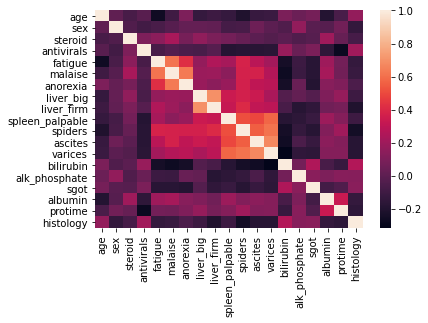

In [85]:
#Heatmap for Correlation
sns.heatmap(xfeatures.corr())

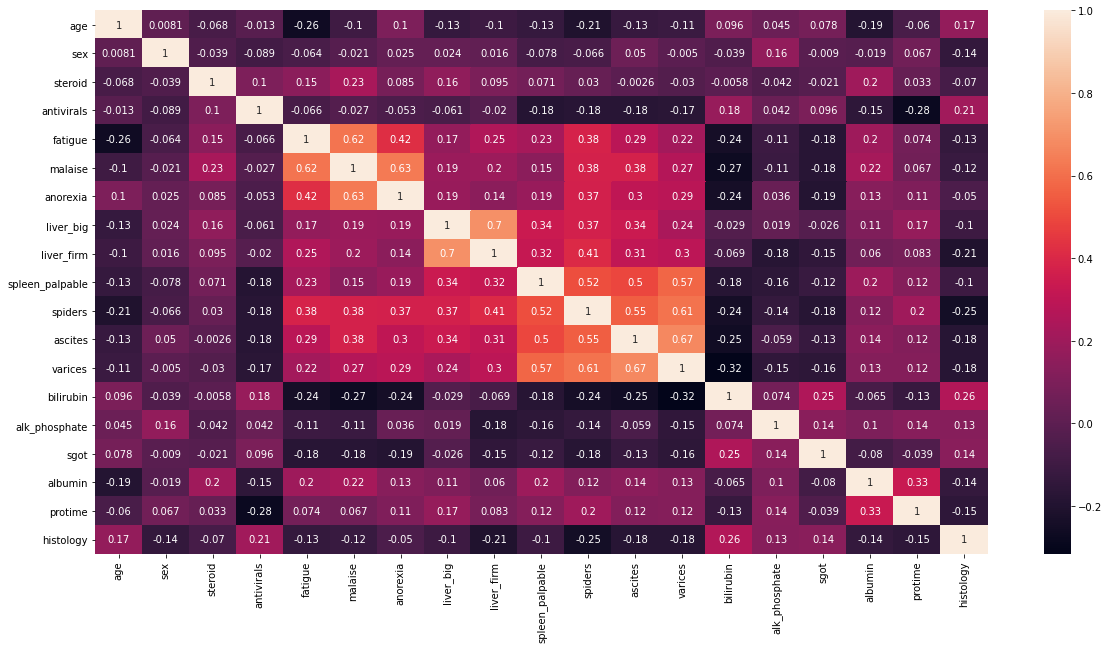

In [86]:
#Heatmap for Correlation with Annot
plt.figure(figsize=(20,10))
sns.heatmap(xfeatures.corr(),annot = True)
plt.show()

Model Building


*   Features And labels
*  Train/Test/Split
*   Logistic Regression
*   RF
*   DCT
*   Serialize





In [87]:
### ML pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier

##Metrices
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [88]:
# Feature for Initial Data
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [89]:
xfeatures

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [90]:
ylabels= df['class']

In [91]:
#Selected Features
xfeatures_best=df[['age', 'sex', 'steroid', 'antivirals', 'fatigue',  'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

In [131]:
#train/test data 70% training 30% test
x_train_70,x_test_30,y_train_70,y_test_30 = train_test_split(xfeatures,ylabels,test_size=0.30,random_state = 3)

In [93]:
#train/test data 75% training 25% test
x_train_75,x_test_25,y_train_75,y_test_25 = train_test_split(xfeatures,ylabels,test_size=0.25,random_state =4)

In [94]:
#train/test data 80% training 20% test
x_train_80,x_test_20,y_train_80,y_test_20 = train_test_split(xfeatures,ylabels,test_size=0.20,random_state = 4)

In [95]:
#train/test dataset for best features 70% training 30% testing
x_train_b_70,x_test_b_30,y_train_b_70,y_test_b_30 = train_test_split(xfeatures_best,ylabels,test_size=0.30,random_state = 3)

In [96]:
#train/test dataset for best features 75% training 25% testing
x_train_b_75,x_test_b_25,y_train_b_75,y_test_b_25 = train_test_split(xfeatures_best,ylabels,test_size=0.25,random_state = 4)

In [97]:
#train/test dataset for best features 80% training 20% testing
x_train_b_80,x_test_b_20,y_train_b_80,y_test_b_20 = train_test_split(xfeatures_best,ylabels,test_size=0.20,random_state = 4)

In [132]:
#Building Model 70% training 30% testing
logreg = LogisticRegression()
logreg.fit(x_train_70,y_train_70)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
#Model Accuracy
#Method 1
logreg.score(x_test_30,y_test_30)

0.851063829787234

In [100]:
#Method 2
logreg.predict(x_test_30)

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2])

In [101]:
print(list(y_test_30))

[2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [102]:
accuracy_score(y_test_30,logreg.predict(x_test_30))

0.851063829787234

In [103]:
#Building Model 75% training 25% testing
logreg = LogisticRegression()
logreg.fit(x_train_75,y_train_75)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
#Model Accuracy
logreg.score(x_test_25,y_test_25)

0.8717948717948718

In [105]:
#Building Model 80% training 20% testing
logreg = LogisticRegression()
logreg.fit(x_train_80,y_train_80)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
#Model Accuracy
logreg.score(x_test_20,y_test_20)

0.8387096774193549

Checking for best features selected


In [107]:
best_logreg = LogisticRegression()
best_logreg.fit(x_train_b_70,y_train_b_70)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
#Model Accuracy
#Method 1
best_logreg.score(x_test_b_30,y_test_b_30)

0.851063829787234

In [110]:
##Single Prediction
x_test_30.iloc[0]

age                42.0
sex                 1.0
steroid             2.0
antivirals          2.0
fatigue             2.0
malaise             2.0
anorexia            2.0
liver_big           2.0
liver_firm          2.0
spleen_palpable     1.0
spiders             2.0
ascites             2.0
varices             2.0
bilirubin           1.5
alk_phosphate      85.0
sgot               40.0
albumin             0.0
protime             0.0
histology           2.0
Name: 122, dtype: float64

Decision Tree Clasifier

In [111]:
res_dic = {'Die':1,"Live":2}
x1 = x_test_30.iloc[1]

In [112]:
#Reshaping 
logreg.predict(np.array(x1).reshape(1,-1))

array([2])

In [113]:
##Alternative Algorithm
clf = DecisionTreeClassifier()

In [114]:
#Fit
clf.fit(x_train_b_80,y_train_b_80)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [115]:
#Model Accuracy Score
clf.score(x_test_b_20,y_test_b_20)

0.6774193548387096

KNN

In [116]:
##KNN
from sklearn.neighbors import KNeighborsClassifier

In [117]:
knn = KNeighborsClassifier(n_neighbors=1)

In [120]:
#Fit
knn.fit(x_train_70,y_train_70)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [121]:
#Model Accuracy Scorre
knn.score(x_test_30,y_test_30)

0.723404255319149